In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
df_1 = pd.read_csv('Downloads/fashion-mnist_train.csv', index_col = False)

In [3]:
df_2 = pd.read_csv('Downloads/fashion-mnist_test.csv', index_col = False)

In [4]:
frames = [df_1,df_2]
frame = pd.concat(frames)

In [5]:
frame.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
frame = frame.sort_values(by=['label'])

In [7]:
frame.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
34999,0,0,0,0,0,0,0,0,1,0,...,144,151,140,0,0,3,0,0,0,0
37588,0,0,0,0,0,5,0,0,28,130,...,102,141,198,68,0,0,5,0,0,0
37596,0,0,0,0,0,0,0,0,0,32,...,0,41,186,0,0,0,0,0,0,0
37601,0,0,0,0,0,0,0,0,0,21,...,15,15,31,29,0,0,0,0,0,0
37605,0,0,0,0,0,0,0,0,0,30,...,0,0,0,0,0,0,0,0,0,0


In [8]:
frame = frame.reset_index(drop=True)

In [9]:
frame.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,1,0,...,144,151,140,0,0,3,0,0,0,0
1,0,0,0,0,0,5,0,0,28,130,...,102,141,198,68,0,0,5,0,0,0
2,0,0,0,0,0,0,0,0,0,32,...,0,41,186,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,21,...,15,15,31,29,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,30,...,0,0,0,0,0,0,0,0,0,0


<Figure size 432x288 with 0 Axes>

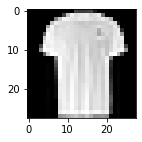

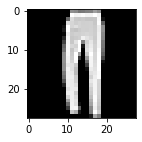

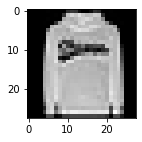

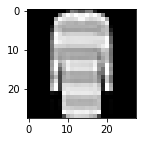

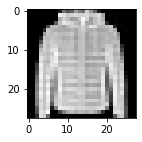

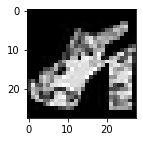

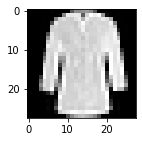

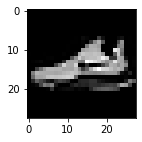

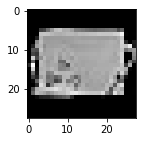

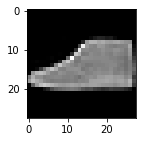

In [23]:
for label in range(10):
    arr = np.array(frame.loc[7000*label,:][1:])
    im = arr.reshape(28,28)
    plt.gray()
    plt.figure(figsize=(2,2))
    plt.imshow(im)

In [10]:
X = frame[frame.columns.drop('label')]
Y = frame['label']

In [11]:
neigh = KNeighborsClassifier(n_neighbors=20, weights='uniform', algorithm = 'brute', 
    leaf_size = 30, p=2, metric='minkowski', metric_params=None,  n_jobs=None)

In [26]:
scores = []
for i in range(1,7):
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, test_size= i/7, random_state=42)
    
    neigh.fit(X_train,Y_train)
    score = neigh.score(X_test,Y_test)
    scores.append(score)

In [27]:
exec_times = [40, 71, 73, 72, 63, 18]

In [15]:
new_scores = []

In [16]:
train_frame = frame[frame.index % 7 != 0]
test_frame = frame[frame.index % 7 == 0]

train_frame = train_frame.reset_index(drop=True)
test_frame = test_frame.reset_index(drop=True)

X_train = train_frame[train_frame.columns.drop('label')]
Y_train = train_frame['label']

X_test = test_frame[test_frame.columns.drop('label')]
Y_test = test_frame['label']

neigh.fit(X_train,Y_train)
score = neigh.score(X_test,Y_test)
new_scores.append(score)

In [17]:
train_frame = frame[(frame.index % 7 != 0) & (frame.index % 7 != 1)]
test_frame = frame[(frame.index % 7 == 0) | (frame.index % 7 == 1)]

train_frame = train_frame.reset_index(drop=True)
test_frame = test_frame.reset_index(drop=True)

X_train = train_frame[train_frame.columns.drop('label')]
Y_train = train_frame['label']

X_test = test_frame[test_frame.columns.drop('label')]
Y_test = test_frame['label']

neigh.fit(X_train,Y_train)
score = neigh.score(X_test,Y_test)
new_scores.append(score)

In [18]:
train_frame = frame[(frame.index % 7 != 0) & (frame.index % 7 != 1) & (frame.index % 7 != 2)]
test_frame = frame[(frame.index % 7 == 0) | (frame.index % 7 == 1) | (frame.index % 7 == 2)]

train_frame = train_frame.reset_index(drop=True)
test_frame = test_frame.reset_index(drop=True)

X_train = train_frame[train_frame.columns.drop('label')]
Y_train = train_frame['label']

X_test = test_frame[test_frame.columns.drop('label')]
Y_test = test_frame['label']

neigh.fit(X_train,Y_train)
score = neigh.score(X_test,Y_test)
new_scores.append(score)

In [19]:
train_frame = frame[(frame.index % 7 == 0) | (frame.index % 7 == 1) | (frame.index % 7 == 2)]
test_frame = frame[(frame.index % 7 != 0) & (frame.index % 7 != 1) & (frame.index % 7 != 2)]

train_frame = train_frame.reset_index(drop=True)
test_frame = test_frame.reset_index(drop=True)

X_train = train_frame[train_frame.columns.drop('label')]
Y_train = train_frame['label']

X_test = test_frame[test_frame.columns.drop('label')]
Y_test = test_frame['label']

neigh.fit(X_train,Y_train)
score = neigh.score(X_test,Y_test)
new_scores.append(score)

In [20]:
train_frame = frame[(frame.index % 7 == 0) | (frame.index % 7 == 1)]
test_frame = frame[(frame.index % 7 != 0) & (frame.index % 7 != 1)]

train_frame = train_frame.reset_index(drop=True)
test_frame = test_frame.reset_index(drop=True)

X_train = train_frame[train_frame.columns.drop('label')]
Y_train = train_frame['label']

X_test = test_frame[test_frame.columns.drop('label')]
Y_test = test_frame['label']

neigh.fit(X_train,Y_train)
score = neigh.score(X_test,Y_test)
new_scores.append(score)

In [21]:

train_frame = frame[frame.index % 7 == 0]
test_frame = frame[frame.index % 7 != 0]

train_frame = train_frame.reset_index(drop=True)
test_frame = test_frame.reset_index(drop=True)

X_train = train_frame[train_frame.columns.drop('label')]
Y_train = train_frame['label']

X_test = test_frame[test_frame.columns.drop('label')]
Y_test = test_frame['label']

neigh.fit(X_train,Y_train)
score = neigh.score(X_test,Y_test)
new_scores.append(score)

In [22]:
new_scores

[0.8485, 0.84385, 0.8379, 0.8373, 0.82754, 0.8141333333333334]

In [23]:
train_size = []
for i in range(1,7):
    train_size.append(1000*i)

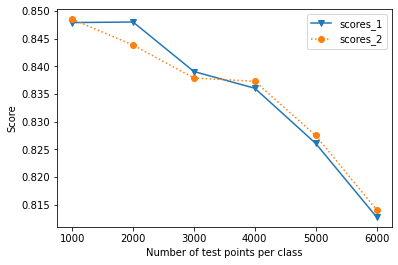

In [24]:
plt.plot(train_size, scores, marker="v", label = 'scores_1')
plt.plot(train_size, new_scores, marker="o", linestyle = ':', label = 'scores_2')
plt.xlabel('Number of test points per class')
plt.ylabel('Score')
plt.legend()
plt.show()

In [25]:
new_exec_times = [21, 35, 44, 41, 35, 22]

In [26]:
exec_times = np.array(exec_times)

In [27]:
new_exec_times = np.array(new_exec_times)

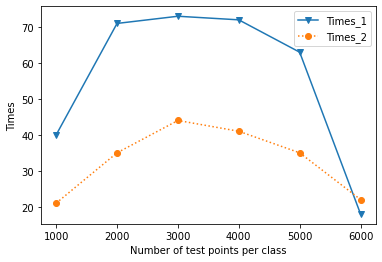

In [28]:
plt.plot(train_size, exec_times, marker="v", label = 'Times_1')
plt.plot(train_size, new_exec_times, marker="o", linestyle = ':', label = 'Times_2')
plt.xlabel('Number of test points per class')
plt.ylabel('Times')
plt.legend()
plt.show()

In [12]:
norm_1= KNeighborsClassifier(n_neighbors=20, weights='uniform', algorithm = 'brute', 
    leaf_size = 30, p=1, metric='minkowski', metric_params=None,  n_jobs=None)

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, test_size= 1/7, random_state=42)
norm_1.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='brute', n_neighbors=20, p=1)

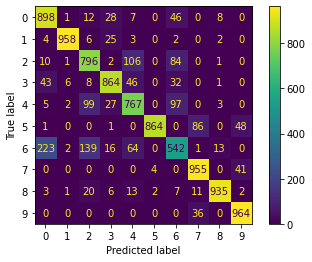

In [15]:
predictions = norm_1.predict(X_test)
cm = confusion_matrix(Y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

In [31]:
 X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, test_size= 1/7, random_state=42)
    
norm_1.fit(X_train,Y_train)
norm_1.score(X_test,Y_test)

0.8543

In [32]:
scores[0]

0.8479

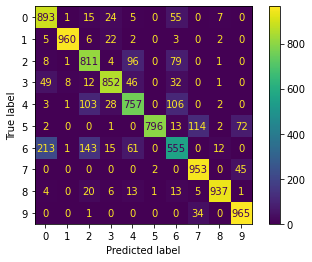

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, test_size= 1/7, random_state=42)
neigh.fit(X_train,Y_train)

predictions = neigh.predict(X_test)
cm = confusion_matrix(Y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

In [44]:
frame_red_1 = frame[(frame.label == 2)|(frame.label == 3)|(frame.label == 4)|(frame.label == 6)]
frame_red_2 = frame[(frame.label == 5)|(frame.label == 7)|(frame.label == 9)]

In [45]:
X_1 = frame_red_1[frame_red_1.columns.drop('label')]
Y_1 = frame_red_1['label']
X_2 = frame_red_2[frame_red_2.columns.drop('label')]
Y_2 = frame_red_2['label']

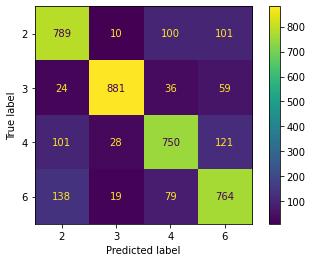

In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(X_1, Y_1, stratify=Y_1, test_size= 1/7, random_state=42)
neigh.fit(X_train,Y_train)

predictions = neigh.predict(X_test)
cm = confusion_matrix(Y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=neigh.classes_)

disp.plot()
plt.show()

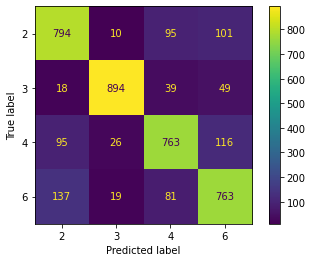

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X_1, Y_1, stratify=Y_1, test_size= 1/7, random_state=42)
norm_1.fit(X_train,Y_train)

predictions = norm_1.predict(X_test)
cm = confusion_matrix(Y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=norm_1.classes_)

disp.plot()
plt.show()

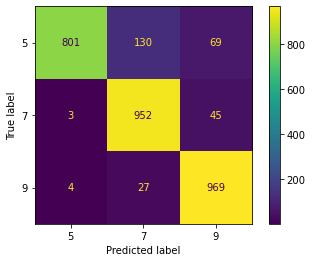

In [35]:
 X_train, X_test, Y_train, Y_test = train_test_split(X_2, Y_2, stratify=Y_2, test_size= 1/7, random_state=42)
neigh.fit(X_train,Y_train)

predictions = neigh.predict(X_test)
cm = confusion_matrix(Y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=neigh.classes_ )

disp.plot()
plt.show()

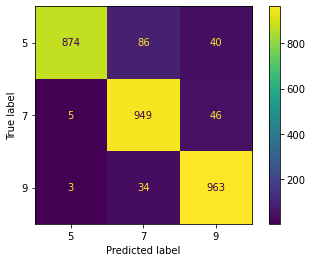

In [43]:
 X_train, X_test, Y_train, Y_test = train_test_split(X_2, Y_2, stratify=Y_2, test_size= 1/7, random_state=42)
norm_1.fit(X_train,Y_train)

predictions = norm_1.predict(X_test)
cm = confusion_matrix(Y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=norm_1.classes_)

disp.plot()
plt.show()

In [14]:
frame_mod = frame
X_mod = frame_mod[frame_mod.columns.drop('label')]
Y_mod = frame_mod['label']

In [15]:
X_mod = X_mod[X_mod == 0]

In [16]:
X_mod = X_mod.fillna(255)

In [17]:
X_mod.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,255.0,0.0,0.0,...,255.0,255.0,255.0,0.0,0.0,255.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,255.0,0.0,0.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,0.0,0.0,255.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,255.0,255.0,...,0.0,255.0,255.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,255.0,255.0,...,255.0,255.0,255.0,255.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,255.0,255.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<Figure size 432x288 with 0 Axes>

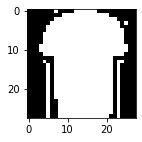

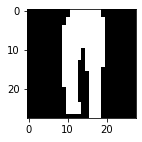

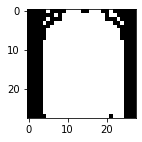

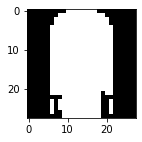

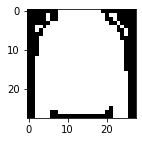

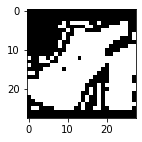

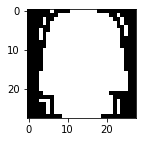

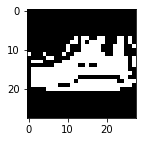

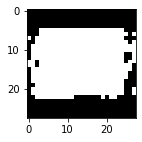

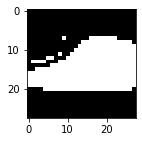

In [64]:
for label in range(10):
    arr = np.array(X_mod.loc[7000*label,:][:])
    im = arr.reshape(28,28)
    plt.gray()
    plt.figure(figsize=(2,2))
    plt.imshow(im)

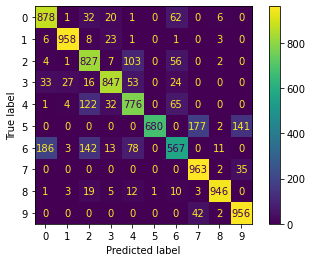

In [65]:
X_train, X_test, Y_train, Y_test = train_test_split(X_mod, Y_mod, stratify=Y_mod, test_size= 1/7, random_state=42)
neigh.fit(X_train,Y_train)

predictions = neigh.predict(X_test)
cm = confusion_matrix(Y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

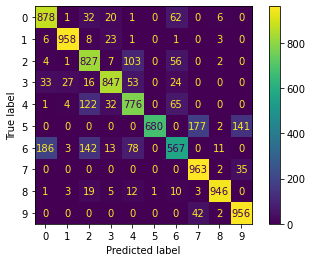

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X_mod, Y_mod, stratify=Y_mod, test_size= 1/7, random_state=42)
norm_1.fit(X_train,Y_train)

predictions = norm_1.predict(X_test)
cm = confusion_matrix(Y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()